In [3]:
#Pre-requsities : Investpy Library
pip install investpy

     |████████████████████████████████| 4.4MB 12.6MB/s 
     |████████████████████████████████| 245kB 58.4MB/s 
     |████████████████████████████████| 5.5MB 44.7MB/s 
     |████████████████████████████████| 512kB 43.6MB/s 
  Created wheel for investpy: filename=investpy-1.0.3-cp37-none-any.whl size=4466737 sha256=e228ecb3e58e4140cbf21a676dcebe6f99bd9aad6c4fdf30e231859ce039a6bc
  Stored in directory: /root/.cache/pip/wheels/ef/ef/31/cd22f970a59025c6d6dee56091b1f538d850e932697db1950e
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


In [5]:
#Import Packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
import seaborn as sns
import pandas_datareader as web
import investpy
plt.rcParams['font.family'] = 'serif'

In [6]:
#Import data BRK-A
start = '01/01/2016'
end = '31/12/2020'

df = investpy.get_stock_historical_data(stock='BRKa', country='United States', from_date = start, to_date = end)

In [9]:
#Daily Returns
returns = 100 * df['Close'].pct_change().dropna()
returns

Date
2016-01-05    0.359153
2016-01-06    0.210660
2016-01-07   -0.929514
2016-01-08   -0.858984
2016-01-11   -0.433213
                ...   
2020-12-24    1.058004
2020-12-28    0.687323
2020-12-29    0.647692
2020-12-30    0.079752
2020-12-31    0.788189
Name: Close, Length: 1258, dtype: float64

In [11]:
#Pre-requisites - ARCH Library
pip install arch

     |████████████████████████████████| 808kB 12.2MB/s 


In [27]:
#GARCH (1,1)
model_garch = arch_model(returns, p=2, o=0, q=2, power=1.0)
residual_garch = model_garch.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 1874.5333254694463
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1861.4436338244964
Iteration:      3,   Func. Count:     31,   Neg. LLF: 1861.0841505749884
Iteration:      4,   Func. Count:     40,   Neg. LLF: 1855.708427070006
Iteration:      5,   Func. Count:     49,   Neg. LLF: 1853.3499663128607
Iteration:      6,   Func. Count:     58,   Neg. LLF: 1851.7184326593388
Iteration:      7,   Func. Count:     67,   Neg. LLF: 1849.6760861064613
Iteration:      8,   Func. Count:     76,   Neg. LLF: 1847.6523239335725
Iteration:      9,   Func. Count:     85,   Neg. LLF: 1847.261709462666
Iteration:     10,   Func. Count:     94,   Neg. LLF: 1846.6644204400884
Iteration:     11,   Func. Count:    103,   Neg. LLF: 1846.52222017728
Iteration:     12,   Func. Count:    113,   Neg. LLF: 1846.4664976218164
Iteration:     13,   Func. Count:    121,   Neg. LLF: 1846.3789266519534
Iteration:     14,   Func. Count:    129,   Neg. LLF: 1

In [29]:
#GJR-GARCH
gjr_garch_model = arch_model(returns, p=2, q=2)
residual_gjr = gjr_garch_model.fit(update_freq=5, disp="off")

In [30]:
#E-GARCH
egarch_model = arch_model(returns, p = 2, q = 2, vol = 'EGARCH', dist = 't')
residual_egarch = egarch_model.fit(disp = 'off')

In [35]:
#GARCH Volatilities
gjrgarch_volatility = residual_gjr.conditional_volatility
garch_volatility = residual_garch.conditional_volatility
egarch_volatility = residual_egarch.conditional_volatility

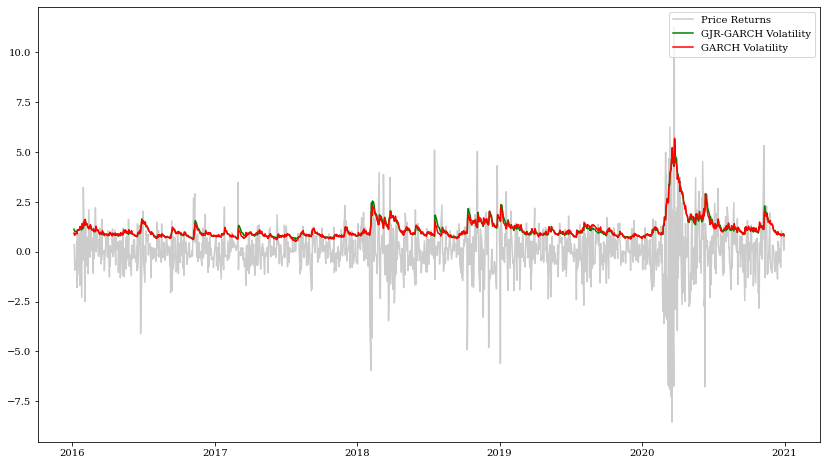

In [36]:
#Comparison - GARCH V GJR-GARCH
plt.figure(figsize=(14,8))
plt.plot(returns, color = 'grey', alpha = 0.4, label = 'Price Returns')
plt.plot(gjrgarch_volatility, color = 'green', label = 'GJR-GARCH Volatility')
plt.plot(garch_volatility, color = 'red', label = 'GARCH Volatility')
plt.legend(loc = 'upper right')
plt.show()

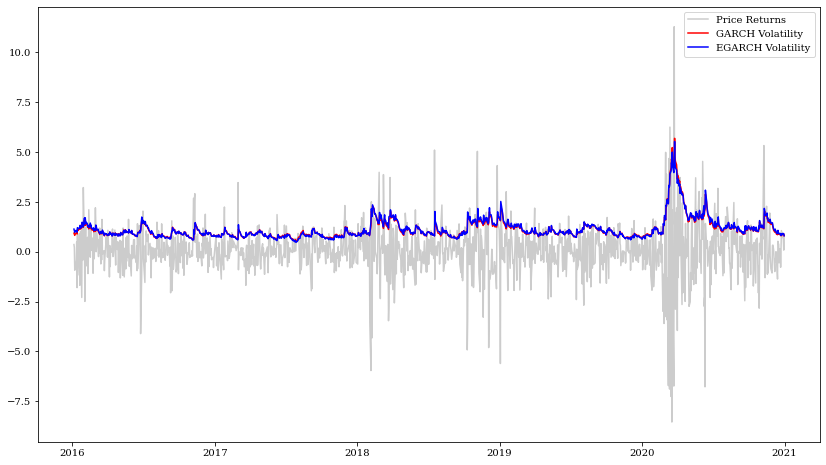

In [38]:
#Comparison - GARCH V E-GARCH
plt.figure(figsize=(14,8))
plt.plot(returns, color = 'grey', alpha = 0.4, label = 'Price Returns')
plt.plot(garch_volatility, color = 'red', label = 'GARCH Volatility')
plt.plot(egarch_volatility, color = 'blue', label = 'EGARCH Volatility')
plt.legend(loc = 'upper right')
plt.show()

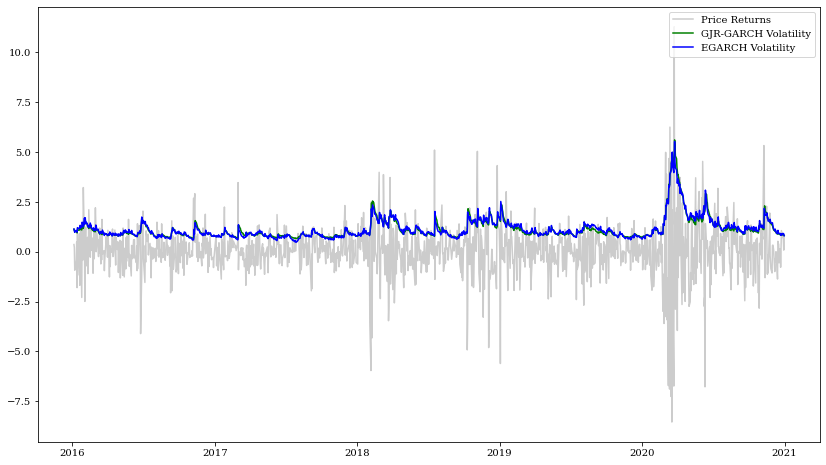

In [39]:
#Comparison - GJR-GARCH V E-GARCH
plt.figure(figsize=(14,8))
plt.plot(returns, color = 'grey', alpha = 0.4, label = 'Price Returns')
plt.plot(gjrgarch_volatility, color = 'green', label = 'GJR-GARCH Volatility')
plt.plot(egarch_volatility, color = 'blue', label = 'EGARCH Volatility')
plt.legend(loc = 'upper right')
plt.show()

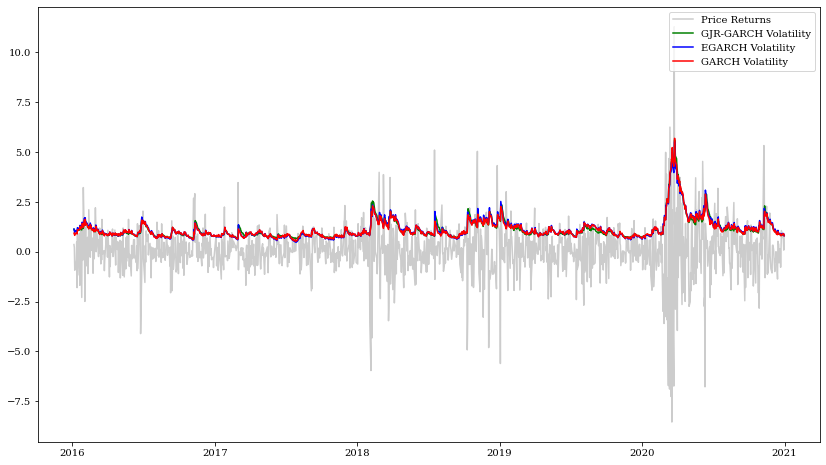

In [40]:
plt.figure(figsize=(14,8))
plt.plot(returns, color = 'grey', alpha = 0.4, label = 'Price Returns')
plt.plot(gjrgarch_volatility, color = 'green', label = 'GJR-GARCH Volatility')
plt.plot(egarch_volatility, color = 'blue', label = 'EGARCH Volatility')
plt.plot(garch_volatility, color = 'red', label = 'GARCH Volatility')
plt.legend(loc = 'upper right')
plt.show()